In [2]:


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

def analisis_multivariado(df):
    """
    Realiza un análisis multivariado de las variables 'housing_median_age', 'total_rooms', y 'median_house_value'.

    Args:
        df: DataFrame de pandas con las columnas especificadas.
    """

    variables = ['housing_median_age', 'total_rooms', 'median_house_value']
    df_analisis = df[variables].copy()

    for col in variables:
        if df_analisis[col].isnull().any():

            df_analisis[col].fillna(df_analisis[col].median(), inplace=True)
            print(f'Valores nulos en "{col}" reemplazados por la mediana')

    correlation_matrix = df_analisis.corr()

    plt.figure(figsize=(8, 6))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title('Matriz de Correlación')
    plt.show()

    sns.pairplot(df_analisis)
    plt.show()
    print(df_analisis.describe())


    for var1 in variables:
      for var2 in variables:
        if var1 != var2:
          correlation, p_value = pearsonr(df_analisis[var1], df_analisis[var2])
          print(f'Correlación entre {var1} y {var2}: {correlation:.2f}, p-value: {p_value:.3f}')


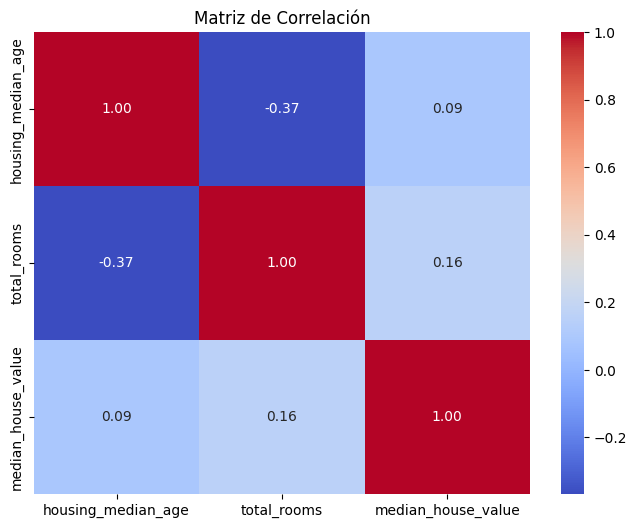

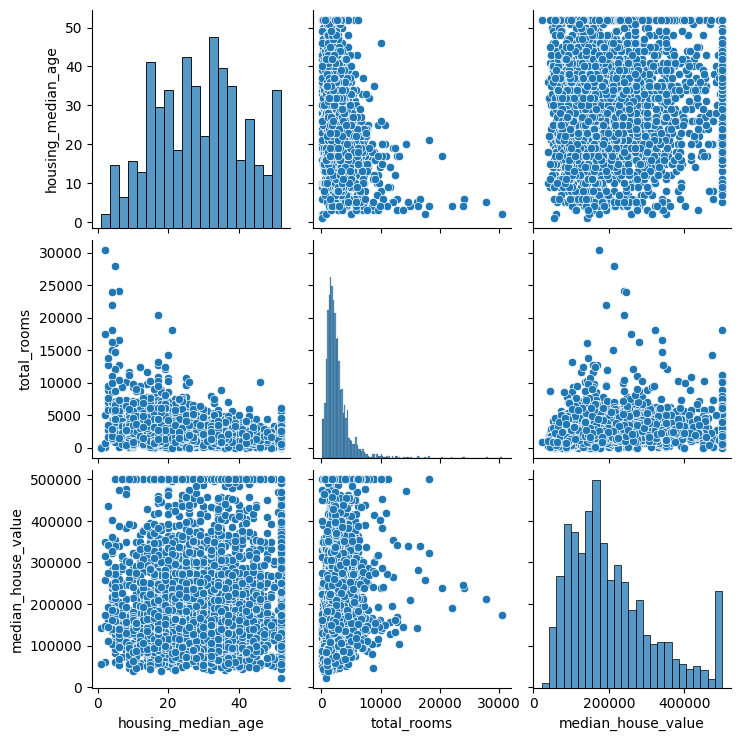

       housing_median_age   total_rooms  median_house_value
count         3000.000000   3000.000000          3000.00000
mean            28.845333   2599.578667        205846.27500
std             12.555396   2155.593332        113119.68747
min              1.000000      6.000000         22500.00000
25%             18.000000   1401.000000        121200.00000
50%             29.000000   2106.000000        177650.00000
75%             37.000000   3129.000000        263975.00000
max             52.000000  30450.000000        500001.00000
Correlación entre housing_median_age y total_rooms: -0.37, p-value: 0.000
Correlación entre housing_median_age y median_house_value: 0.09, p-value: 0.000
Correlación entre total_rooms y housing_median_age: -0.37, p-value: 0.000
Correlación entre total_rooms y median_house_value: 0.16, p-value: 0.000
Correlación entre median_house_value y housing_median_age: 0.09, p-value: 0.000
Correlación entre median_house_value y total_rooms: 0.16, p-value: 0.000


In [5]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr


file_path = 'sample_data/california_housing_test.csv'
try:
    df = pd.read_csv(file_path)
except FileNotFoundError:
    print(f"Error: Archivo '{file_path}' no encontrado.")
    exit()
analisis_multivariado(df)
